## Desafio 1 
No meu dia a dia, identifiquei a necessidade de organizar os dados relacionados ao salão de beleza da minha avó. 
Esse processo de organização é crucial porque o salão oferece uma variedade de serviços, e entender o comportamento das 
clientes em relação a esses serviços pode trazer insights valiosos. Atualmente, os dados estão espalhados e não organizados 
de maneira a dificultar a análise. Organizar esses dados nos permitirá não apenas entender quais serviços são mais procurados, mas também identificar padrões de comportamento, como os dias da semana em que há maior demanda por certos serviços.

Uma vez que esses dados estiverem organizados, espero poder responder a perguntas cruciais para o negócio, como: 
Quais serviços são mais procurados pelas clientes? Em quais dias da semana há uma maior procura por esses serviços? 
Qual é o perfil demográfico das clientes, incluindo faixa etária e estado civil? Ter essas respostas é fundamental 
para que possamos otimizar a operação do salão, ajustando a escala de trabalho para atender melhor a demanda e criando 
campanhas de marketing mais eficazes e direcionadas. Assim, poderemos aumentar a satisfação das clientes e, consequentemente, a rentabilidade do negócio.


## Desafio 2 
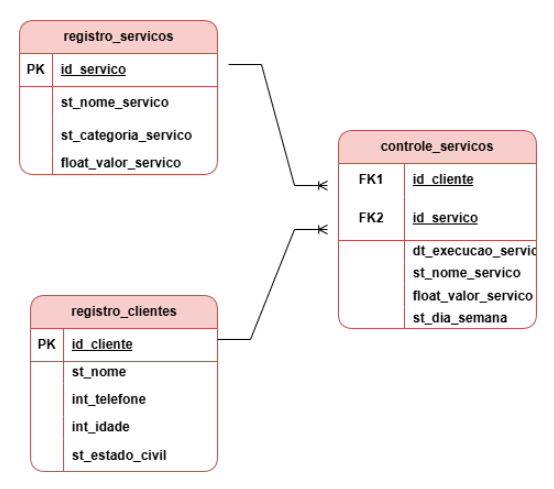

In [1]:
## Desafio 3

# Importei a biblioteca
import sqlite3

#Criei uma conexão com um banco de dados (no caso, não há um arquivo de banco de dados pré feito, então decidiu-se inicializar um denominado dados_salao.db)
conn = sqlite3.connect("dados_salao.db")

# Criar um cursor no banco que permitirá o uso de comandos no formato SQL
cur  = conn.cursor()

# Criando a tabela registro_servicos
cur.execute("""
CREATE TABLE IF NOT EXISTS registro_servicos (
  id_servico TEXT NOT NULL PRIMARY KEY,
  st_nome_servico TEXT NOT NULL,
  st_categoria_servico TEXT NOT NULL,
  float_valor_servico REAL NOT NULL
)
""")

# Criando a tabela registro_clientes
cur.execute("""
CREATE TABLE IF NOT EXISTS registro_clientes (
  id_cliente TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL,
  int_telefone INT NOT NULL,
  int_idade INT NOT NULL,
  st_estado_civil TEXT NOT NULL
)
""")

# Criando a tabela controle_servicos
cur.execute("""
CREATE TABLE controle_servicos(
  id_cliente TEXT NOT NULL,
  id_servico TEXT NOT NULL,
  dt_execucao_servico REAL NOT NULL,
  st_nome_servico TEXT NOT NULL,
  float_valor_servico REAL NOT NULL,
  st_dia_semana TEXT NOT NULL,
  FOREIGN KEY (id_cliente)
      REFERENCES registro_clientes (id_cliente)
         ON DELETE CASCADE
         ON UPDATE NO ACTION
  FOREIGN KEY (id_servico)
      REFERENCES registro_servico (id_servico)
         ON DELETE CASCADE
         ON UPDATE NO ACTION
)
""")


In [2]:
# Inserção na tabela registro_servicos (id_servico, st_nome_servico, st_categoria_servico, float_valor_servico)

cur.execute("""
INSERT INTO registro_servicos VALUES
  ('s1','esmaltação em gel','manicure e pedicure',60),
  ('s2','escovação','cuidado capilar',40),
  ('s3','corte de cabelo','cuidado capilar',25),
  ('s4','tintura','cuidado capilar',30),
  ('s5','depilação completa','cuidado corporal',100)
""")

# Comitar as inserções
conn.commit()

#Verificar dados na tabela
res = cur.execute("SELECT * FROM registro_servicos")
res.fetchall()

[('s1', 'esmaltação em gel', 'manicure e pedicure', 60.0),
 ('s2', 'escovação', 'cuidado capilar', 40.0),
 ('s3', 'corte de cabelo', 'cuidado capilar', 25.0),
 ('s4', 'tintura', 'cuidado capilar', 30.0),
 ('s5', 'depilação completa', 'cuidado corporal', 100.0)]

In [3]:
# Inserção na tabela tabela registro_clientes

cur.execute("""
INSERT INTO registro_clientes VALUES
  ('c1','Clarice', 61989998452, 45, 'casada'),
  ('c2','Paula', 61985822469, 23, 'solteira'),
  ('c3','Fernanda', 61998547965, 39, 'divorciada'),
  ('c4','Sonia', 61995658223, 52, 'casada'),
  ('c5','Cassia', 61998956429, 41, 'casada')
""")

# Comitar as inserções
conn.commit()

#Verificar dados na tabela
res = cur.execute("SELECT * FROM registro_clientes")
res.fetchall()

[('c1', 'Clarice', 61989998452.0, 45.0, 'casada'),
 ('c2', 'Paula', 61985822469.0, 23.0, 'solteira'),
 ('c3', 'Fernanda', 61998547965.0, 39.0, 'divorciada'),
 ('c4', 'Sonia', 61995658223.0, 52.0, 'casada'),
 ('c5', 'Cassia', 61998956429.0, 41.0, 'casada')]

In [4]:
# Inserção na tabela controle_servicos

cur.execute("""
INSERT INTO controle_servicos (id_cliente, id_servico, dt_execucao_servico, st_nome_servico, float_valor_servico, st_dia_semana) VALUES
  ('c1', 's5', '05/08/2024', 'depilação completa', 100, 'segunda-feira'),
  ('c2', 's3', '05/08/2024', 'corte de cabelo', 25, 'segunda-feira'),
  ('c2', 's4', '05/08/2024', 'tintura', 30, 'segunda-feira'),
  ('c2', 's2', '05/08/2024', 'escovação', 40, 'segunda-feira'),
  ('c3', 's1', '06/08/2024', 'esmaltação em gel', 60, 'terça-feira'),
  ('c3', 's2', '06/08/2024', 'escovação', 40, 'terça-feira'),
  ('c1', 's1', '06/08/2024', 'esmaltação em gel', 60, 'terça-feira'),
  ('c4', 's4', '07/08/2024', 'tintura', 30, 'quarta-feira'),
  ('c4', 's3', '08/08/2024', 'corte de cabelo', 25, 'quinta-feira'),
  ('c1', 's3', '09/09/2024', 'corte de cabelo', 25, 'sexta-feira'),
  ('c1', 's2', '09/09/2024', 'escovação', 40, 'sexta-feira'),
  ('c2', 's1', '09/09/2024', 'esmaltação em gel', 60, 'sexta-feira'),
  ('c5', 's2', '09/09/2024', 'escovação', 40, 'sexta-feira'),
  ('c5', 's5', '09/09/2024', 'depilação completa', 100, 'sexta-feira'),
  ('c5', 's1', '09/09/2024', 'esmaltação em gel', 60, 'sexta-feira')
""")

# Comitar as inserções
conn.commit()

#Verificar dados na tabela
res = cur.execute("SELECT * FROM controle_servicos")
res.fetchall()

[('c1', 's5', '05/08/2024', 'depilação completa', 100.0, 'segunda-feira'),
 ('c2', 's3', '05/08/2024', 'corte de cabelo', 25.0, 'segunda-feira'),
 ('c2', 's4', '05/08/2024', 'tintura', 30.0, 'segunda-feira'),
 ('c2', 's2', '05/08/2024', 'escovação', 40.0, 'segunda-feira'),
 ('c3', 's1', '06/08/2024', 'esmaltação em gel', 60.0, 'terça-feira'),
 ('c3', 's2', '06/08/2024', 'escovação', 40.0, 'terça-feira'),
 ('c1', 's1', '06/08/2024', 'esmaltação em gel', 60.0, 'terça-feira'),
 ('c4', 's4', '07/08/2024', 'tintura', 30.0, 'quarta-feira'),
 ('c4', 's3', '08/08/2024', 'corte de cabelo', 25.0, 'quinta-feira'),
 ('c1', 's3', '09/09/2024', 'corte de cabelo', 25.0, 'sexta-feira'),
 ('c1', 's2', '09/09/2024', 'escovação', 40.0, 'sexta-feira'),
 ('c2', 's1', '09/09/2024', 'esmaltação em gel', 60.0, 'sexta-feira'),
 ('c5', 's2', '09/09/2024', 'escovação', 40.0, 'sexta-feira'),
 ('c5', 's5', '09/09/2024', 'depilação completa', 100.0, 'sexta-feira'),
 ('c5', 's1', '09/09/2024', 'esmaltação em gel', 6

In [8]:
## Desafio 4

#Consultando para verificar o registro e atualizar o número de telefone de uma cliente
res = cur.execute("SELECT * FROM registro_clientes WHERE st_nome = 'Clarice';")
res.fetchall()

[('c1', 'Clarice', 61989998452.0, 45.0, 'casada')]

In [11]:
#Atualizando o número de telefone
res = cur.execute("UPDATE registro_clientes SET int_telefone = 61988887777 WHERE st_nome = 'Clarice';")
conn.commit()


In [12]:
#Consultando para verificar se a mudança ocorreu corretamente 
res = cur.execute("SELECT * FROM registro_clientes WHERE st_nome = 'Clarice';")
print(res.fetchall())

[('c1', 'Clarice', 61988887777.0, 45.0, 'casada')]


In [13]:
## Desafio 5 

#Realizar consulta para responder quais serviços são os mais procurados pelas clientes
res = cur.execute("SELECT st_nome_servico, COUNT(*) AS quantidade FROM controle_servicos GROUP BY st_nome_servico ORDER BY quantidade DESC;")
res.fetchall()



[('esmaltação em gel', 4),
 ('escovação', 4),
 ('corte de cabelo', 3),
 ('tintura', 2),
 ('depilação completa', 2)]

In [14]:
#Realizar consulta para responder em quais dias da semana há uma maior procura por serviços
res = cur.execute("SELECT st_dia_semana, COUNT(*) AS quantidade FROM controle_servicos GROUP BY st_dia_semana ORDER BY quantidade DESC;")
res.fetchall()


[('sexta-feira', 6),
 ('segunda-feira', 4),
 ('terça-feira', 3),
 ('quinta-feira', 1),
 ('quarta-feira', 1)]

In [19]:
#Realizar consulta para responder qual é o perfil demográfico das clientes (faixa etária e estado civil) que mais utilizam 
#os serviços do salão?
res = cur.execute("SELECT registro_clientes.int_idade, registro_clientes.st_estado_civil, COUNT(*) AS quantidade FROM registro_clientes JOIN controle_servicos ON registro_clientes.id_cliente = controle_servicos.id_cliente GROUP BY registro_clientes.int_idade, registro_clientes.st_estado_civil ORDER BY quantidade DESC;")
print(res.fetchall())

[(23.0, 'solteira', 4), (45.0, 'casada', 4), (41.0, 'casada', 3), (39.0, 'divorciada', 2), (52.0, 'casada', 2)]
